In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sn
import gmaps
import json
from scipy.stats import sem,chisquare
from scipy.stats import linregress
from api_key import g_key

In [93]:
filepath = "Resources/merged_final.csv"
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,Census_Tract,Pct_Pop_Below_Pov,Pct_Child_Below_Pov,Offense,Method,Latitude,Longitude,Start_Date,CCN
0,0,201,100.0,25.055524,THEFT/OTHER,OTHERS,38.912577,-77.073401,2017-10-18 17:00:00+00:00,17401735
1,1,201,100.0,25.055524,THEFT/OTHER,OTHERS,38.912603,-77.074958,2017-11-20 05:55:00+00:00,17401924
2,2,201,100.0,25.055524,THEFT/OTHER,OTHERS,38.910192,-77.069144,2017-07-18 18:15:00+00:00,17401306
3,3,201,100.0,25.055524,THEFT F/AUTO,OTHERS,38.911183,-77.069192,2017-02-12 14:00:29+00:00,17029071
4,4,201,100.0,25.055524,THEFT F/AUTO,OTHERS,38.910192,-77.069144,2017-03-05 12:00:58+00:00,17037424


In [94]:
lastone = "lastone.csv"
df2 = pd.read_csv(lastone)
df2.head()

,Unnamed: 0,Census,Number of Crimes,Total Population,Percentage of Population in Poverty,Percentage of Children in Poverty,Latitude,Longitude
0,0,201,23,24.0,100.0,25.055524,38.911904,-77.074202
1,1,202,603,3595.0,16.2,0.000000,38.906516,-77.065324
2,2,501,105,3593.0,7.1,10.900000,38.924631,-77.052344
3,3,502,65,3296.0,2.8,0.000000,38.928411,-77.057113
4,4,701,43,5643.0,11.7,8.000000,38.930409,-77.075336


In [97]:
df2['Poverty Population']=df2['Total Population']*df2['Percentage of Population in Poverty']/100
df2

,Unnamed: 0,Census,Number of Crimes,Total Population,Percentage of Population in Poverty,Percentage of Children in Poverty,Latitude,Longitude,Poverty Population
0,0,201,23,24.0,100.0,25.055524,38.911904,-77.074202,24.000
1,1,202,603,3595.0,16.2,0.000000,38.906516,-77.065324,582.390
2,2,501,105,3593.0,7.1,10.900000,38.924631,-77.052344,255.103
3,3,502,65,3296.0,2.8,0.000000,38.928411,-77.057113,92.288
4,4,701,43,5643.0,11.7,8.000000,38.930409,-77.075336,660.231
...,...,...,...,...,...,...,...,...,...
122,122,9903,98,1952.0,19.3,34.100000,38.888687,-76.920801,376.736
123,123,9904,118,2948.0,35.3,48.100000,38.884916,-76.930460,1040.644
124,124,9905,144,2852.0,28.4,44.400000,38.884172,-76.924967,809.968
125,125,9906,86,1623.0,22.9,27.700000,38.888275,-76.935810,371.667


# Does theft occur higher in areas with a higher poverty rate?


In [98]:
#Census_Pov = df.groupby(["Census_Tract"]).mean()['Pct_Pop_Below_Pov']
Census_Pov = df2.groupby(["Census"]).mean()['Poverty Population']
Census_Pov

Census
201       24.000
202      582.390
501      255.103
502       92.288
701      660.231
          ...   
9903     376.736
9904    1040.644
9905     809.968
9906     371.667
9907     798.624
Name: Poverty Population, Length: 127, dtype: float64

In [99]:
Census_Crimes = df2.groupby(["Census"]).mean()['Number of Crimes']
Census_Crimes

Census
201      23
202     603
501     105
502      65
701      43
       ... 
9903     98
9904    118
9905    144
9906     86
9907    108
Name: Number of Crimes, Length: 127, dtype: int64

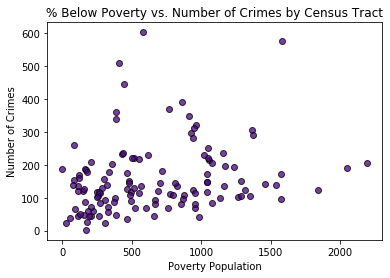

In [100]:
plt.scatter(Census_Pov, Census_Crimes, marker="o", facecolors="indigo", edgecolors="black",
            alpha=0.75)
plt.title('% Below Poverty vs. Number of Crimes by Census Tract')
plt.xlabel('Poverty Population')
plt.ylabel('Number of Crimes')
plt.show()

The r-squared is: 0.05803598457803587


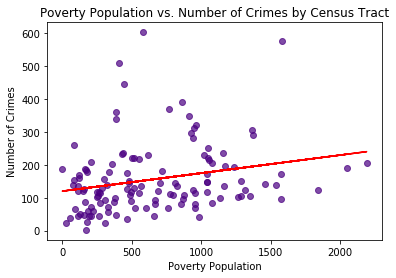

y = 0.05x + 119.87
0.006365391334539105


In [104]:
x_values = Census_Pov
y_values = Census_Crimes
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "indigo", alpha = 0.7)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Poverty Population')
plt.ylabel('Number of Crimes')
plt.title('Poverty Population vs. Number of Crimes by Census Tract')
print(f"The r-squared is: {rvalue**2}")
plt.show()
print(line_eq)
print(pvalue)

In [102]:
census_crime_mean = df.groupby(["Census_Tract"]).mean()['Pct_Pop_Below_Pov']

In [103]:
df.groupby(["Census_Tract"]).mean()['Pct_Pop_Below_Pov']


Census_Tract
201     100.0
202      16.2
501       7.1
502       2.8
701      11.7
        ...  
9903     19.3
9904     35.3
9905     28.4
9906     22.9
9907     28.8
Name: Pct_Pop_Below_Pov, Length: 127, dtype: float64

In [11]:
gmaps.configure(api_key=g_key)

In [12]:
locations = df[['Latitude', 'Longitude']]
poor_area = df['Pct_Pop_Below_Pov']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=poor_area))
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
locations = df2[['Latitude', 'Longitude']]
poor_area = df2['Poverty Population']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=poor_area))
fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
tract = df.groupby(["Census_Tract"]).mean()

In [15]:
pov_sort = tract.sort_values(by='Pct_Pop_Below_Pov', ascending=False )
pov_sort

,Unnamed: 0,Pct_Pop_Below_Pov,Pct_Child_Below_Pov,Latitude,Longitude,CCN
Census_Tract,,,,,,
201,11.0,100.0,25.055524,38.911904,-77.074202,1.716064e+07
7401,8302.0,64.6,69.000000,38.860443,-76.995674,1.711211e+07
7408,8931.0,52.6,77.100000,38.853319,-76.970368,1.709627e+07
8803,14732.0,48.6,62.600000,38.912086,-76.989589,1.711303e+07
7406,8685.0,48.5,55.500000,38.855362,-76.989345,1.711373e+07
...,...,...,...,...,...,...
8301,13237.0,3.4,0.000000,38.898280,-77.000785,1.713437e+07
4201,5097.0,3.1,0.000000,38.916383,-77.038252,1.713996e+07
502,763.0,2.8,0.000000,38.928411,-77.057113,1.712785e+07


In [71]:
pov_top_ten = pov_sort.head(10)
pov_top_ten

,Unnamed: 0,Pct_Pop_Below_Pov,Pct_Child_Below_Pov,Latitude,Longitude,CCN
Census_Tract,,,,,,
201,11.0,100.0,25.055524,38.911904,-77.074202,1.716064e+07
7401,8302.0,64.6,69.000000,38.860443,-76.995674,1.711211e+07
7408,8931.0,52.6,77.100000,38.853319,-76.970368,1.709627e+07
8803,14732.0,48.6,62.600000,38.912086,-76.989589,1.711303e+07
7406,8685.0,48.5,55.500000,38.855362,-76.989345,1.711373e+07
9802,18396.5,48.0,66.900000,38.830541,-76.997232,1.711306e+07
6804,7971.0,47.0,0.000000,38.885598,-76.976325,1.713323e+07
7504,9623.0,45.0,59.800000,38.863026,-76.978082,1.711158e+07
7502,9216.5,43.2,56.000000,38.856576,-76.968057,1.710826e+07


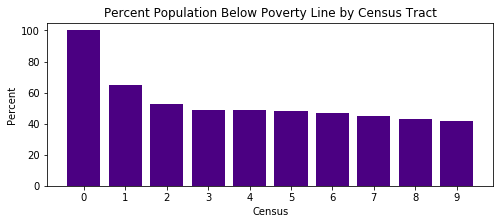

In [82]:
x_axis = np.arange(len(pov_top_ten))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,3))
plt.bar(x_axis, pov_top_ten["Pct_Pop_Below_Pov"], color='indigo', alpha=1, align="center")
plt.xticks(range(len(pov_top_ten.index)), pov_top_ten.index)
#plt.xticks(tick_locations, pov_top_ten["Census_Tract"], rotation="45")
plt.xlabel('Census Tract')
plt.ylabel('Percent Below Poverty')
plt.title('Percent Population Below Poverty Line by Census Tract - Top 10')
plt.show()

In [73]:
pov_top_ten

,Unnamed: 0,Pct_Pop_Below_Pov,Pct_Child_Below_Pov,Latitude,Longitude,CCN
Census_Tract,,,,,,
201,11.0,100.0,25.055524,38.911904,-77.074202,1.716064e+07
7401,8302.0,64.6,69.000000,38.860443,-76.995674,1.711211e+07
7408,8931.0,52.6,77.100000,38.853319,-76.970368,1.709627e+07
8803,14732.0,48.6,62.600000,38.912086,-76.989589,1.711303e+07
7406,8685.0,48.5,55.500000,38.855362,-76.989345,1.711373e+07
9802,18396.5,48.0,66.900000,38.830541,-76.997232,1.711306e+07
6804,7971.0,47.0,0.000000,38.885598,-76.976325,1.713323e+07
7504,9623.0,45.0,59.800000,38.863026,-76.978082,1.711158e+07
7502,9216.5,43.2,56.000000,38.856576,-76.968057,1.710826e+07


In [74]:
pov_top_ten.reset_index(inplace = True)
pov_top_ten

,Census_Tract,Unnamed: 0,Pct_Pop_Below_Pov,Pct_Child_Below_Pov,Latitude,Longitude,CCN
0,201,11.0,100.0,25.055524,38.911904,-77.074202,1.716064e+07
1,7401,8302.0,64.6,69.000000,38.860443,-76.995674,1.711211e+07
2,7408,8931.0,52.6,77.100000,38.853319,-76.970368,1.709627e+07
3,8803,14732.0,48.6,62.600000,38.912086,-76.989589,1.711303e+07
4,7406,8685.0,48.5,55.500000,38.855362,-76.989345,1.711373e+07
5,9802,18396.5,48.0,66.900000,38.830541,-76.997232,1.711306e+07
6,6804,7971.0,47.0,0.000000,38.885598,-76.976325,1.713323e+07
7,7504,9623.0,45.0,59.800000,38.863026,-76.978082,1.711158e+07
8,7502,9216.5,43.2,56.000000,38.856576,-76.968057,1.710826e+07
9,9602,17599.5,41.9,55.700000,38.901807,-76.948867,1.712568e+07


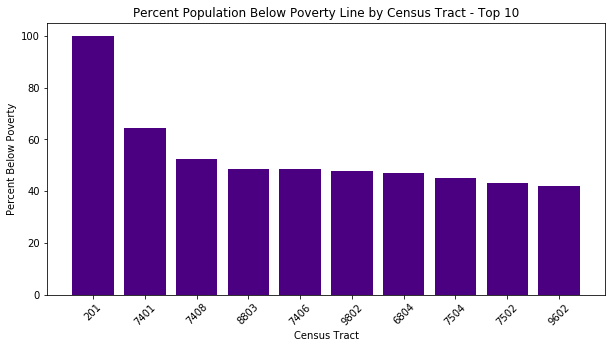

In [86]:
x_axis = np.arange(len(pov_top_ten))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, pov_top_ten["Pct_Pop_Below_Pov"], color='indigo', alpha=1, align="center")
#plt.xticks(range(len(pov_top_ten.index)), pov_top_ten.index)
plt.xticks(tick_locations, pov_top_ten["Census_Tract"], rotation="45")
plt.xlabel('Census Tract')
plt.ylabel('Percent Below Poverty')
plt.title('Percent Population Below Poverty Line by Census Tract - Top 10 - Final')
plt.show()

In [75]:
info_box_template = """
<dl>
<dt>Census Tract</dt><dd>{Census_Tract}</dd>
<dt>% Below Poverty Line</dt><dd>{Pct_Pop_Below_Pov}</dd>
<dt>% Children Below Poverty Line</dt><dd>{Pct_Child_Below_Pov}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
ct_info = [info_box_template.format(**row) for index, row in pov_top_ten.iterrows()]

In [76]:
locations = pov_top_ten[['Latitude', 'Longitude']]
pct_below = pov_top_ten['Pct_Pop_Below_Pov']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=pct_below, max_intensity=45, point_radius=10.0))
fig

Figure(layout=FigureLayout(height='420px'))

In [77]:
fig.add_layer(gmaps.marker_layer(locations, info_box_content = ct_info))
fig

Figure(layout=FigureLayout(height='420px'))